In [1]:
using Plots, Images, ImageMagick
pyplot()

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1273
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1273


Plots.PyPlotBackend()

In [3]:
img = load("stars.png")
gImg = red.(img)*0.299 + green.(img)*0.587 + blue.(img)*0.114
rows, cols = size(img)

(400, 400)

In [4]:
function boxBlur(image,x,y,d)
    if x<=d || y<=d || x>=cols-d || y>=rows-d
        return image[x,y]
    else
        total = 0.0
        for xi = x-d:x+d
            for yi = y-d:y+d
                total += image[xi,yi]
            end
        end
        return total/((2d+1)^2)
    end
end


boxBlur (generic function with 1 method)

In [5]:
blurImg = [boxBlur(gImg,x,y,5) for x in 1:cols, y in 1:rows]

yOriginal, xOriginal = argmax(gImg).I
yBoxBlur, xBoxBlur   = argmax(blurImg).I

(65, 84)

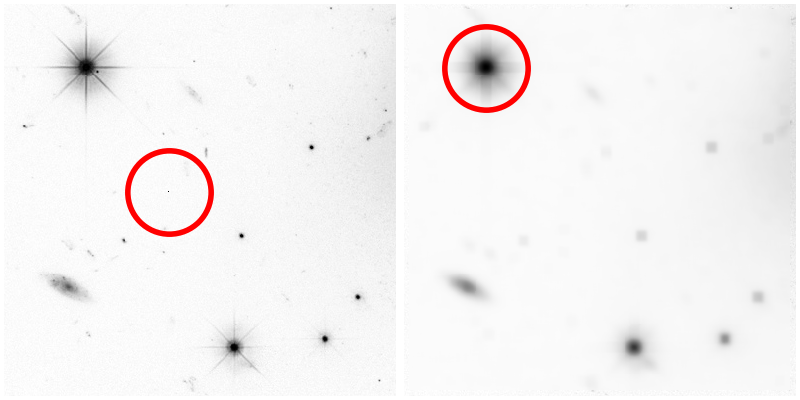

In [6]:
p1 = heatmap(gImg, c=:Greys, yflip=true)
p1 = scatter!((xOriginal, yOriginal), ms=60, ma=0, msw=4, msc=:red) 
p2 = heatmap(blurImg, c=:Greys, yflip=true)
p2 = scatter!((xBoxBlur, yBoxBlur), ms=60, ma=0, msw=4, msc=:red)

plot(p1, p2, size=(800, 400), ratio=:equal, xlims=(0,cols), ylims=(0,rows), 
    colorbar_entry=false, border=:none, legend=:none)